In [ ]:
!pip install ruptures
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.0 MB/s eta 0:00:00


In [ ]:

# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import ruptures as rpt
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from ruptures.costs import costl2

In [ ]:
# Repurérer X
url = "http://allousame.free.fr/mlds/donnees/X.txt"
X = read_csv(url, header=None, sep=" ")
print(X.shape)

(9100, 48)


In [ ]:
X.head()

0         1         2         3         4         5         6   \
0 -1.786785 -1.759306 -1.731826 -1.657497 -1.504801 -1.303554 -1.099353   
1 -0.394478 -0.634234 -0.873990 -1.012224 -0.992106 -0.935577 -0.966903   
2 -1.216742 -1.395422 -1.574103 -1.741657 -1.879992 -1.943143 -1.897188   
3 -0.796512 -1.189678 -1.582845 -1.883616 -2.029875 -2.080617 -2.097591   
4 -0.077746 -0.709023 -1.340300 -1.873472 -2.216010 -2.297673 -2.089215   

         7         8         9   ...        38        39        40        41  \
0 -0.939600 -0.834307 -0.642136  ...  1.796293  1.746644  1.617929  1.374530   
1 -1.040886 -1.074217 -1.000619  ...  0.835603  0.970470  1.115326  1.143106   
2 -1.784239 -1.650855 -1.485354  ...  1.153940  1.267196  1.333831  1.347890   
3 -2.032449 -1.835092 -1.558510  ...  1.156785  1.309893  1.248746  1.033263   
4 -1.703073 -1.269871 -0.851312  ...  1.526477  1.661399  1.647645  1.470649   

         42        43        44        45        46        47  
0  0.991029  0.564313  0.200768 -0.077526 -0.276923 -0.433195  
1  0.943505  0.560883  0.094956 -0.287792 -0.456911 -0.492853  
2  1.308287  1.199404  1.006899  0.736046  0.401007  0.031883  
3  0.756840  0.522058  0.398940  0.318105  0.197855  0.046630  
4  1.130163  0.676563  0.177488 -0.281004 -0.634296 -0.921962  

[5 rows x 48 columns]

In [ ]:
# Récupérer APPART
url = "http://allousame.free.fr/mlds/donnees/APPART.txt"
APPART = read_csv(url, header=None, sep=" ")
APPART.columns = ["appartement"]

In [ ]:
APPART

appartement
0               1
1               1
2               1
3               1
4               1
...           ...
9095          100
9096          100
9097          100
9098          100
9099          100

[9100 rows x 1 columns]

In [ ]:
# Récupérer les JOURS
url = "http://allousame.free.fr/mlds/donnees/JOUR.txt"
JOURS = read_csv(url,header = None, sep =" ")
JOURS.columns = ["jour"]
JOURS

jour
0        1
1        2
2        3
3        4
4        5
...    ...
9095    87
9096    88
9097    89
9098    90
9099    91

[9100 rows x 1 columns]

In [ ]:
data = pd.concat([JOURS,APPART,X],axis=1)
data

jour  appartement         0         1         2         3         4  \
0        1            1 -1.786785 -1.759306 -1.731826 -1.657497 -1.504801   
1        2            1 -0.394478 -0.634234 -0.873990 -1.012224 -0.992106   
2        3            1 -1.216742 -1.395422 -1.574103 -1.741657 -1.879992   
3        4            1 -0.796512 -1.189678 -1.582845 -1.883616 -2.029875   
4        5            1 -0.077746 -0.709023 -1.340300 -1.873472 -2.216010   
...    ...          ...       ...       ...       ...       ...       ...   
9095    87          100 -1.373892 -1.611674 -1.849456 -2.037723 -2.138310   
9096    88          100 -1.061133 -1.326168 -1.591203 -1.909054 -2.301337   
9097    89          100 -0.703021 -0.931821 -1.160621 -1.357542 -1.493810   
9098    90          100 -0.687142 -0.963776 -1.240411 -1.459325 -1.576649   
9099    91          100 -0.673024 -0.898970 -1.124916 -1.331946 -1.497459   

             5         6         7  ...        38        39        40  \
0    -1.303554 -1.099353 -0.939600  ...  1.796293  1.746644  1.617929   
1    -0.935577 -0.966903 -1.040886  ...  0.835603  0.970470  1.115326   
2    -1.943143 -1.897188 -1.784239  ...  1.153940  1.267196  1.333831   
3    -2.080617 -2.097591 -2.032449  ...  1.156785  1.309893  1.248746   
4    -2.297673 -2.089215 -1.703073  ...  1.526477  1.661399  1.647645   
...        ...       ...       ...  ...       ...       ...       ...   
9095 -2.158456 -2.107608 -1.958650  ...  0.529951  0.485765  0.556992   
9096 -2.664871 -2.876890 -2.861083  ...  0.998410  1.241800  1.266223   
9097 -1.553057 -1.536860 -1.506154  ...  1.005878  0.941988  0.802163   
9098 -1.603905 -1.569288 -1.512294  ...  0.660649  0.686355  0.658493   
9099 -1.584118 -1.570258 -1.511638  ...  0.629779  0.761291  0.840578   

            41        42        43        44        45        46        47  
0     1.374530  0.991029  0.564313  0.200768 -0.077526 -0.276923 -0.433195  
1     1.143106  0.943505  0.560883  0.094956 -0.287792 -0.456911 -0.492853  
2     1.347890  1.308287  1.199404  1.006899  0.736046  0.401007  0.031883  
3     1.033263  0.756840  0.522058  0.398940  0.318105  0.197855  0.046630  
4     1.470649  1.130163  0.676563  0.177488 -0.281004 -0.634296 -0.921962  
...        ...       ...       ...       ...       ...       ...       ...  
9095  0.652746  0.672439  0.626687  0.549977  0.461084  0.372155  0.284557  
9096  1.095714  0.790980  0.405643  0.011605 -0.239013 -0.229034 -0.061260  
9097  0.677693  0.636938  0.584028  0.414505  0.153798 -0.147069 -0.464579  
9098  0.573240  0.422843  0.215098 -0.032531 -0.279474 -0.491025 -0.679058  
9099  0.876214  0.875033  0.782792  0.545727  0.173050 -0.305220 -0.838818  

[9100 rows x 50 columns]

In [ ]:
# Concatener les données journalière de chaque apparetment sur les colonnes

Y= pd.DataFrame(columns = list(range(0, 4368)))
for i in range(1,101) :
    app = data.iloc[:,2:].loc[data["appartement"] == i].copy()
    # Concaténer toutes les lignes en une seule ligne
    df_transforme = app.stack().to_frame().T

    # Réinitialiser les index du nouveau DataFrame
    df_transforme.reset_index(drop=True, inplace=True)
    Y.loc[i,:] = df_transforme.values
Y

0         1         2         3         4         5         6     \
1   -1.786785 -1.759306 -1.731826 -1.657497 -1.504801 -1.303554 -1.099353   
2   -1.696926 -1.589682 -1.482438 -1.438186  -1.50461 -1.668164 -1.880164   
3    0.152293 -0.001868 -0.156029 -0.260148 -0.283644  -0.27377 -0.282275   
4   -0.951338 -1.038791 -1.126245  -1.25905 -1.456028 -1.629866 -1.693202   
5   -1.117863  -1.20942 -1.300976  -1.33588 -1.282855 -1.212149 -1.186737   
..        ...       ...       ...       ...       ...       ...       ...   
96  -1.476726  -1.38478 -1.292834 -1.316479 -1.520947  -1.77005 -1.916043   
97  -0.147306 -0.628073 -1.108839 -1.478275 -1.658697 -1.707026 -1.701723   
98   -1.45916 -1.487654 -1.516149 -1.488817 -1.382944 -1.308259 -1.363864   
99  -1.636396 -1.735798   -1.8352 -1.902854 -1.915313  -1.88232  -1.81719   
100 -0.587143 -0.958683 -1.330222 -1.661032 -1.914792 -2.072828 -2.112098   

         7         8         9     ...      4358      4359      4360  \
1     -0.9396 -0.834307 -0.642136  ...   0.80652  0.842348  0.743352   
2   -2.012606 -1.950127 -1.707242  ...  0.816715  0.736486  0.683914   
3   -0.301053 -0.309397 -0.296038  ...  0.744458  0.848834  0.797598   
4   -1.664615 -1.575958 -1.406233  ...  0.487786  0.574832  0.558728   
5   -1.139009 -0.997874 -0.808915  ...  0.674229  0.712476  0.649029   
..        ...       ...       ...  ...       ...       ...       ...   
96  -1.966382 -1.949685 -1.824007  ...  0.524595  0.629315  0.769022   
97  -1.672829 -1.605088  -1.35049  ...  0.803852  1.014642  1.108927   
98  -1.473904 -1.517791 -1.370945  ...  0.368506  0.518264   0.74134   
99  -1.714326 -1.560443  -1.33042  ...  0.387744  0.291293   0.32893   
100 -1.974451  -1.62685 -1.171809  ...  0.629779  0.761291  0.840578   

         4361      4362      4363      4364      4365      4366      4367  
1    0.572553  0.394154  0.236707  0.127456  0.124078  0.266715   0.49493  
2    0.606173  0.432088  0.194261 -0.057964 -0.312055 -0.565359  -0.81793  
3    0.611185   0.32636  0.000687 -0.303251 -0.523594 -0.621051 -0.645872  
4    0.570994   0.72473  0.867772   0.83737  0.693679  0.533052  0.373722  
5    0.493149  0.270269   0.04719 -0.111916 -0.194744 -0.208145 -0.183737  
..        ...       ...       ...       ...       ...       ...       ...  
96   0.837379  0.742844  0.522179  0.223564 -0.187463 -0.742874 -1.382051  
97   1.038618  0.787709  0.439469  0.089793 -0.214186 -0.450071 -0.645637  
98    0.94564  1.016281  0.891805  0.565214  0.193923 -0.069454 -0.255923  
99   0.477352  0.680531  0.842687  0.885235  0.838111   0.75159  0.648769  
100  0.876214  0.875033  0.782792  0.545727   0.17305  -0.30522 -0.838818  

[100 rows x 4368 columns]

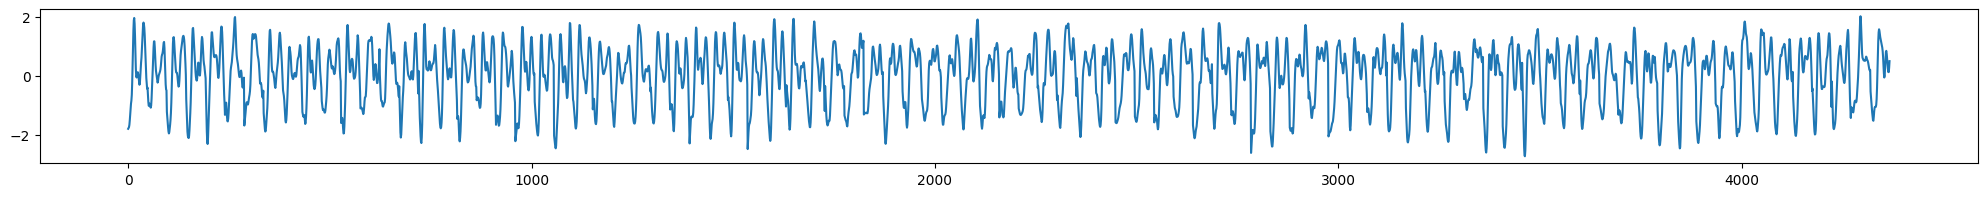

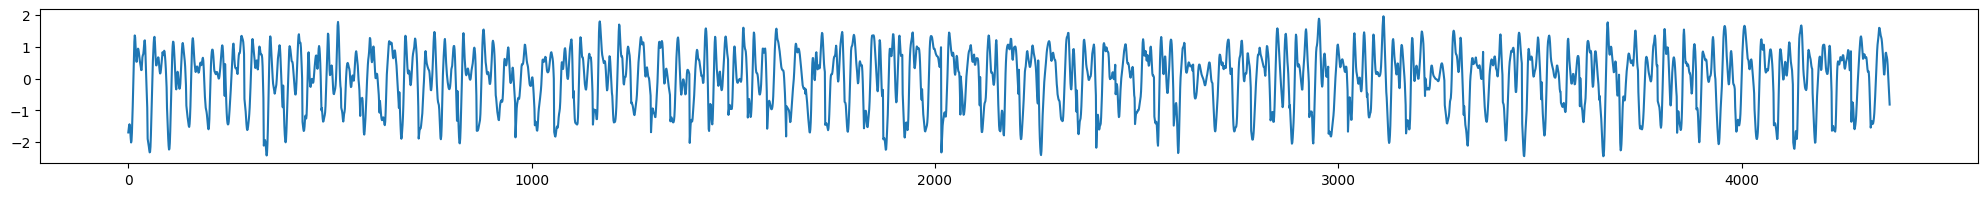

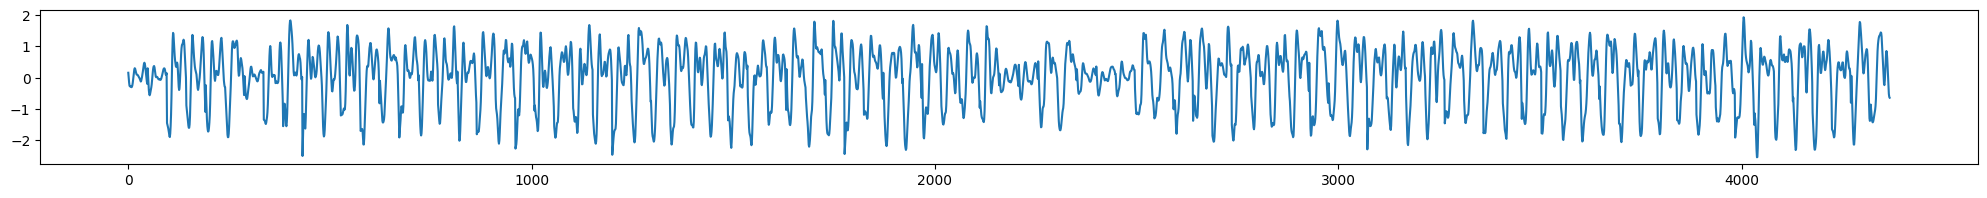

In [ ]:
# Afficher les données des 5 premiers appartement
for i in range(3):
  plt.figure(figsize=(25, 2))
  Y.iloc[i].plot()
  plt.show()

In [ ]:
# Transformation du tableau en regoupant par jour

nb_jours = 91
Y2= pd.DataFrame()

for i in range(nb_jours-1):
  Y2[i] = (Y[[ k for k in range(i*48 ,(i+1)*48)]].sum(axis = 1) )
Y2[90] = Y[[k for k in range(90*48 , 91*48-1)]].sum(axis = 1)
Y2.head(5)

0         1         2         3         4          5         6   \
1  10.695612  3.317783  1.816731 -0.170942  9.427071   2.930542  1.934942   
2   2.707761  0.418042 -3.906145  0.755987  0.170686  10.968174  2.124044   
3   1.647498  0.443568  2.425824  0.070307  1.081296   2.144220 -1.654045   
4  -5.904153  3.828257 -3.463101 -1.734172  1.078066  -1.762765 -0.364210   
5  -2.661249  1.062960 -2.683973  4.439202 -1.972080  -3.779524 -2.358911   

          7         8         9   ...        81        82        83        84  \
1   2.353858 -0.273517 -1.242295  ... -6.830205 -8.209448  0.239532  6.896935   
2 -14.896906  2.993616 -6.331903  ...  0.404758 -1.891170  2.332111  3.354595   
3  -6.224277  8.443819  3.298806  ... -9.759574 -3.584769 -0.256895 -4.600055   
4  -6.221714 -1.984162  7.700487  ...  5.868654 -0.592517  3.422490  1.682658   
5  -3.909017  4.111384 -6.585456  ... -5.118859  2.316118 -2.225060  6.086256   

         85         86        87        88        89        90  
1  1.217387   3.610276 -1.061290 -3.357077  6.104533  3.665043  
2 -2.685411  -1.506695  2.510267  1.955998 -0.806511  9.897686  
3  5.728715   7.172459 -3.063426 -7.615720  0.171141  2.941933  
4  5.671725   8.118207  0.056982  9.015118  1.130749 -0.459813  
5 -2.855952  11.064555  7.715690 -9.530006 -0.444708 -7.688578  

[5 rows x 91 columns]

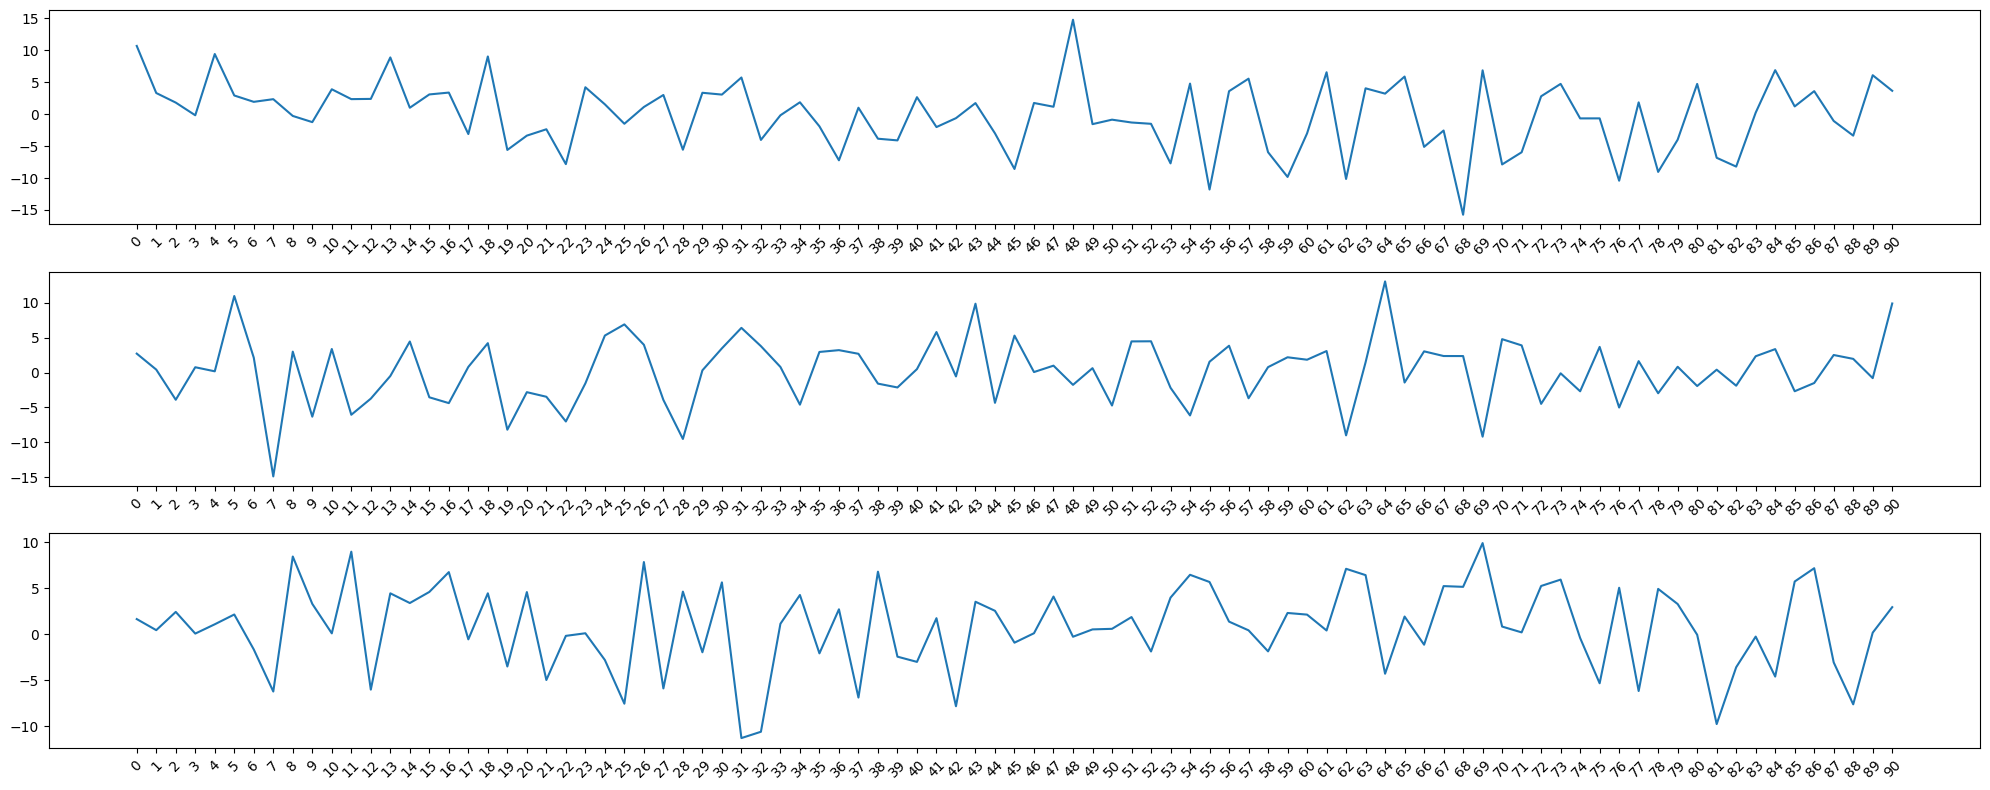

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))

# Parcourir les trois premières lignes de Y et tracer chaque ligne dans un sous-graphique
for i in range(3):
    Y2.iloc[i].plot(ax=axes[i])
    axes[i].set_xticks(Y2.columns)
    axes[i].set_xticklabels(Y2.columns, rotation=45)
plt.tight_layout()
plt.show()

## Programmation Dynamique

In [ ]:
# définir une fonction u(a,b) pour n séries
def u(a,b,series):
    return series.iloc[:,a-1:b].sum(axis=1)/(b-a+1)

u(1,4,Y2)


1      3.914796
2     -0.006089
3      1.146799
4     -1.818292
5      0.039235
         ...   
96    -3.913339
97    -6.289184
98     3.013212
99     0.338527
100    0.744045
Length: 100, dtype: float64

In [ ]:
# définir la matrice triangulaire D(a,b) pour n séries
def D(a,b,series):
    x=series.iloc[:,a-1:b]-u(a,b,Y2)[1]
    squared_norms = (x ** 2).sum(axis=0)  # Calcule la somme des carrés des éléments le long de l'axe
    result = squared_norms.sum()  # Somme des normes au carré des colonnes
    return result
D(1,2,Y2)

13848.566788236225

In [ ]:
memo = {}  # Initialisation d'un dictionnaire pour stocker les résultats précédents

def M(i, k, t, series):
    # Vérifie si les résultats pour ces indices i et k sont déjà enregistrés dans le dictionnaire memo
    if str(i) + "," + str(k) in memo:
        t[0] = memo.get(str(i) + "," + str(k))[0]  # Récupère le premier élément (indice) depuis le dictionnaire memo
        return memo.get(str(i) + "," + str(k))[1]  # Récupère le deuxième élément (valeur min) depuis le dictionnaire memo

    # Si k est égal à 1, calcule la valeur D(1, i, series) et la retourne
    if k == 1:
        t[0] = i
        return D(1, i, series)  # Appel à la fonction D pour calculer la valeur de coût

    else:
        # Crée une liste table avec les résultats récursifs de M(j-1, k-1, t, series) + D(j, i, series) pour chaque j
        table = [M(j-1, k-1, t, series) + D(j, i, series) for j in range(k, i+1)]

        t[0] = np.argmin(table)
        min_val = np.min(table)

        # Enregistre les résultats dans le dictionnaire memo avec la clé str(i)+","+str(k)
        memo[str(i) + "," + str(k)] = (t[0], min_val)

        return min_val  # Retourne la valeur minimale calculée


In [ ]:
def segmentation(series, K, n):
    k = K - 1
    r = n
    t = []

    while (k >= 1):
        min_val = [-1]

        # Appel de la fonction M(r, k+1, min_val, series) pour calculer le coût minimum
        M(r, k+1, min_val, series)

        tk = min_val[0]  # Récupère la valeur minimale calculée dans tk
        r = tk - 1
        t.append(tk)  # Ajoute tk à la liste t
        k = k - 1

    return t  # Retourne la liste t contenant les positions des points de rupture


In [ ]:
memo={}
# application de la segmentation avec k = 9
t=segmentation(Y2,9,91)
t=[t[i]-1 for i in range(len(t))]


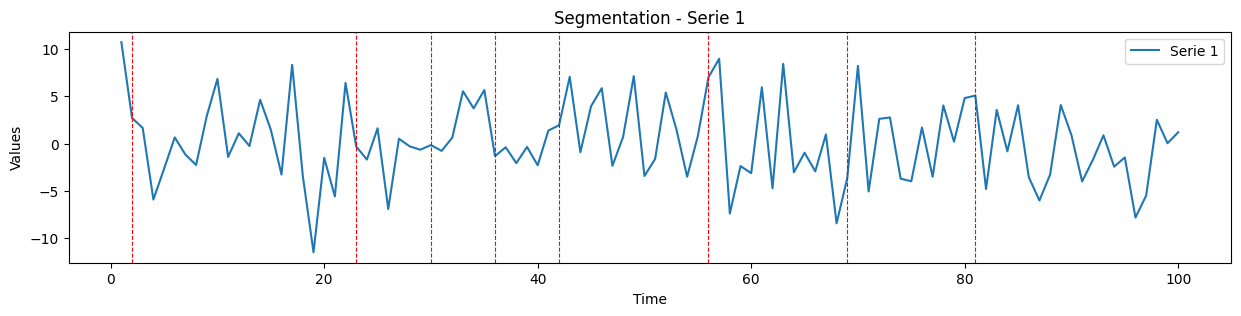

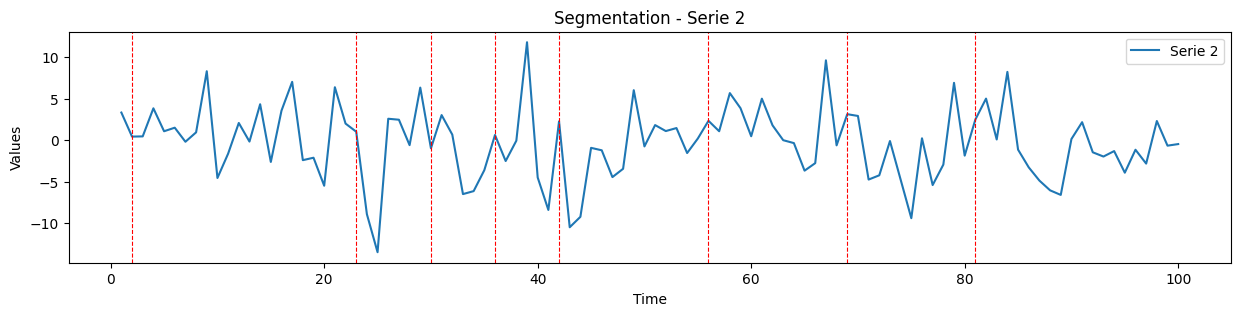

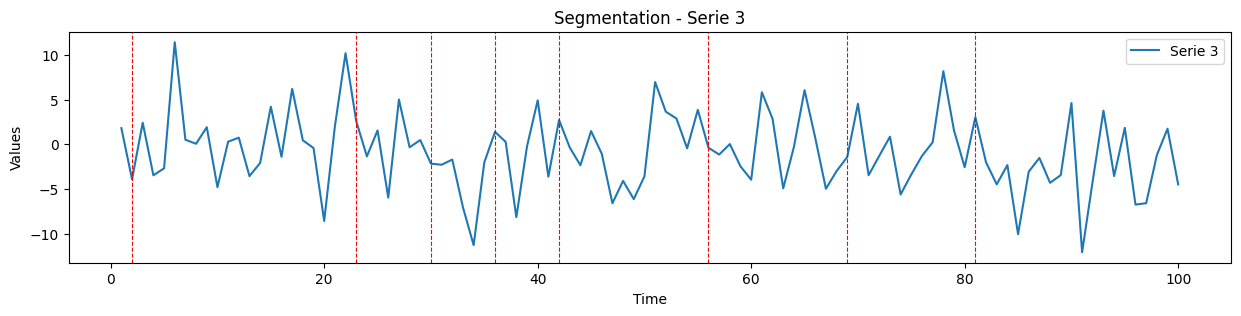

In [ ]:
def plot_segmentation(series, t):
    for i in range(3):
        plt.figure(figsize=(15, 3))
        plt.plot(series.index, series.iloc[:, i], label=f"Serie {i + 1}")

        # Tracer des lignes verticales pour indiquer les points de rupture
        for breakpoint in t:
            plt.axvline(x=breakpoint, color='r', linestyle='--', linewidth=0.8)

        plt.title(f'Segmentation - Serie {i + 1}')
        plt.xlabel('Time')
        plt.ylabel('Values')
        plt.legend()
        plt.show()

# Appel de la fonction avec les données Y2 et les points de rupture t
plot_segmentation(Y2, t)

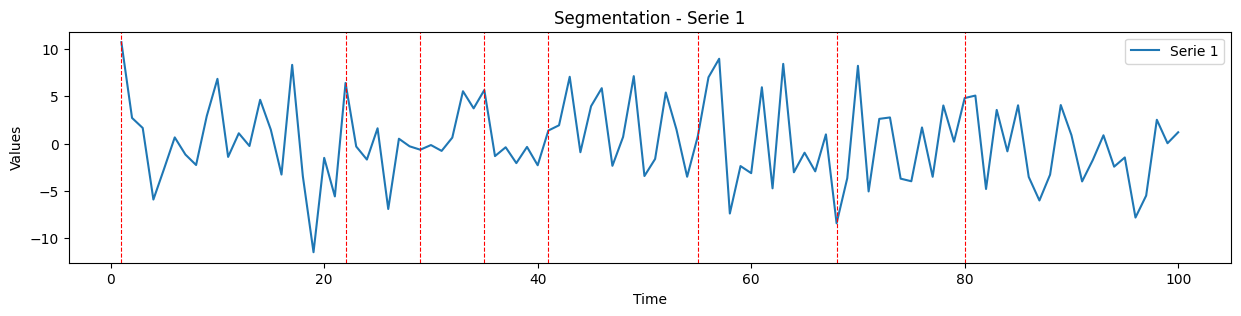

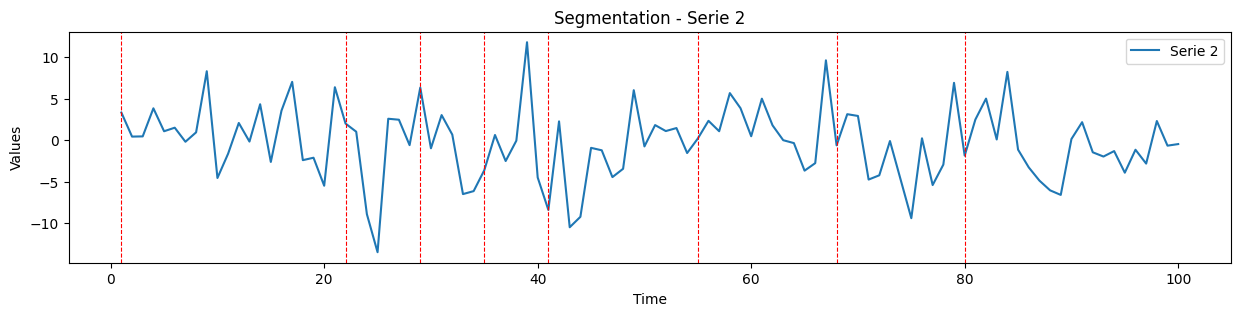

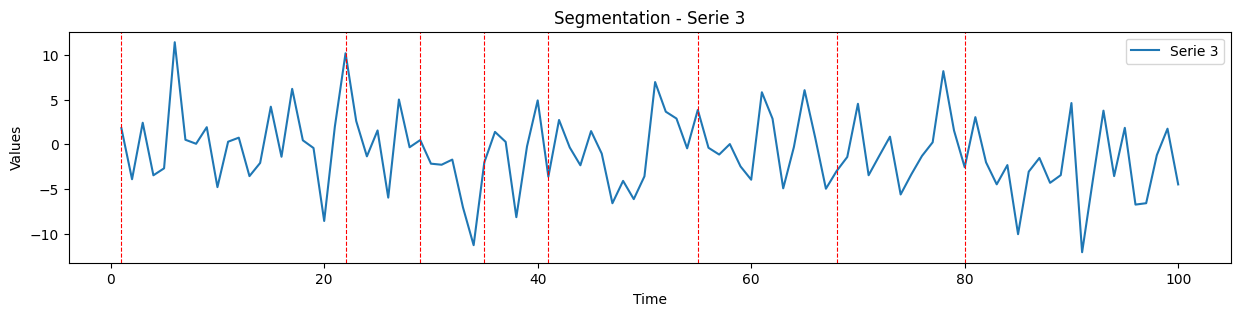

In [ ]:
# application de la segmentation avec k = 11
memo={}
t2=segmentation(Y2,11,91)
t2=[t[i]-1 for i in range(len(t))]
plot_segmentation(Y2,t2)

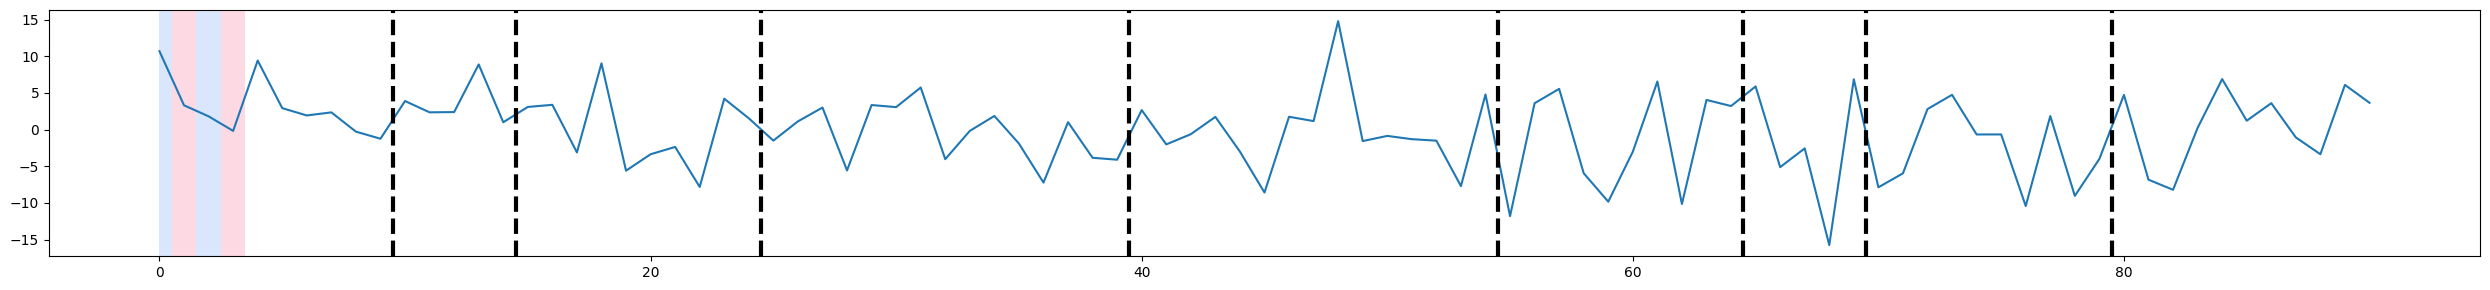

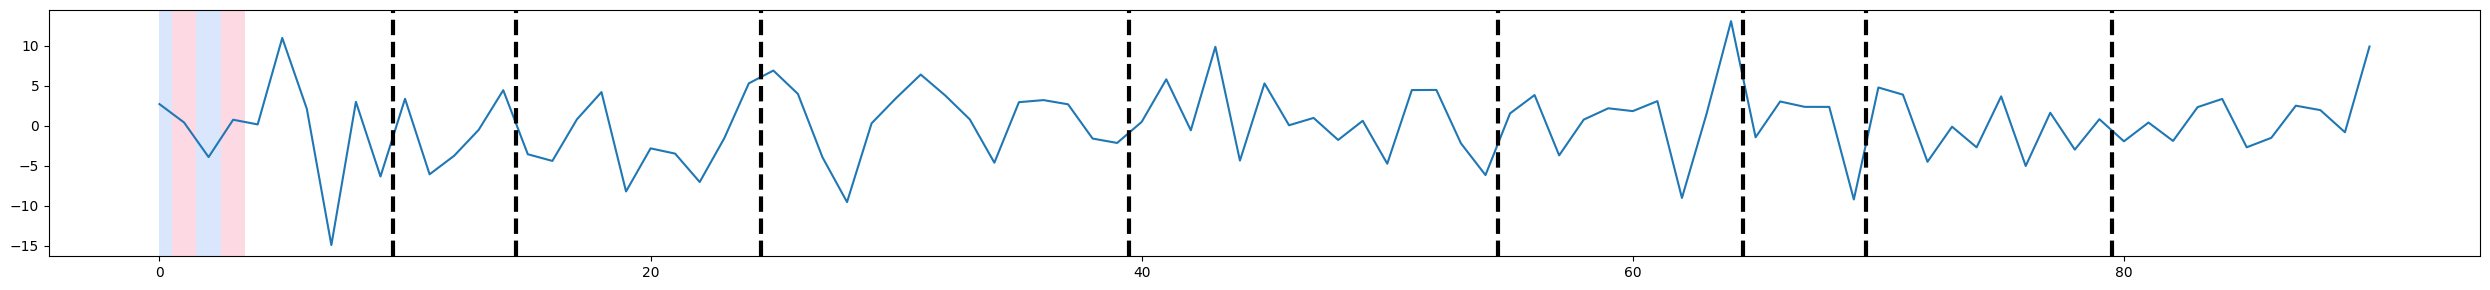

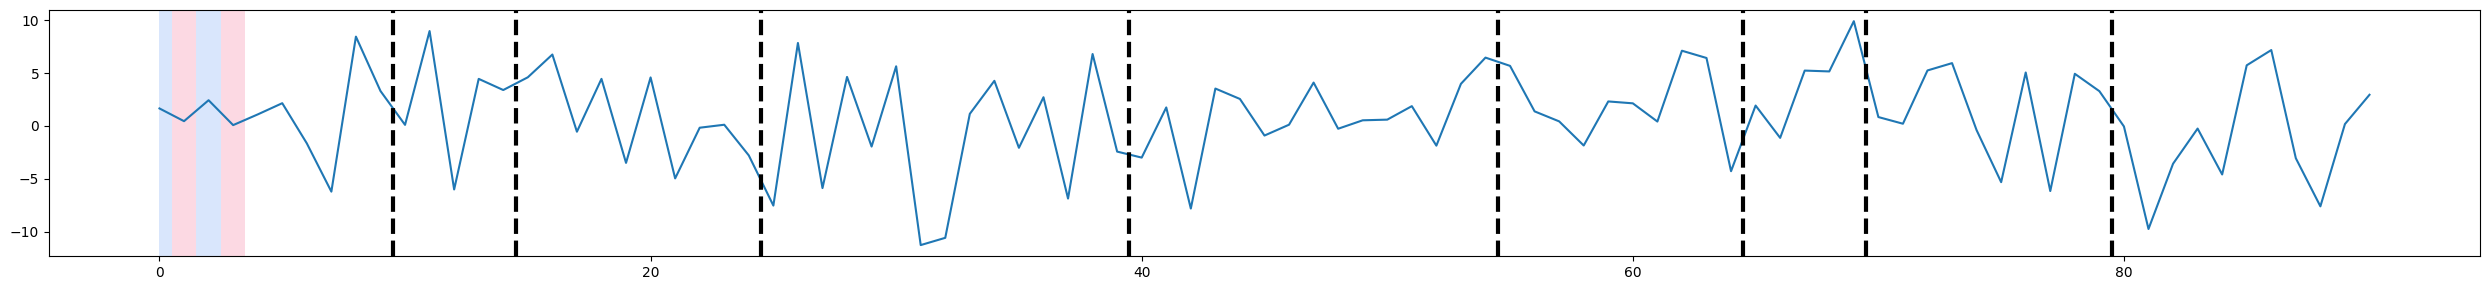

[10, 15, 25, 40, 55, 65, 70, 80, 100]


In [ ]:
# Définition du modèle pour la détection de points de ruptures
model = "l2"

# Initialisation de l'algorithme Dynp avec le modèle spécifié
algo = rpt.Dynp(model=model).fit(Y2.to_numpy())

# Prédiction des points de rupture avec un nombre de breakpoints = 8
my_bkps = algo.predict(n_bkps=8)

# Affichage des résultats pour les premières séries temporelles
for i in range(3):
    # Affiche les résultats de la détection de points de rupture pour les trois premières séries temporelles
    rpt.show.display(Y2.to_numpy()[i], [1, 2, 3, 4], my_bkps, figsize=(25, 3))

plt.show()
print(my_bkps)


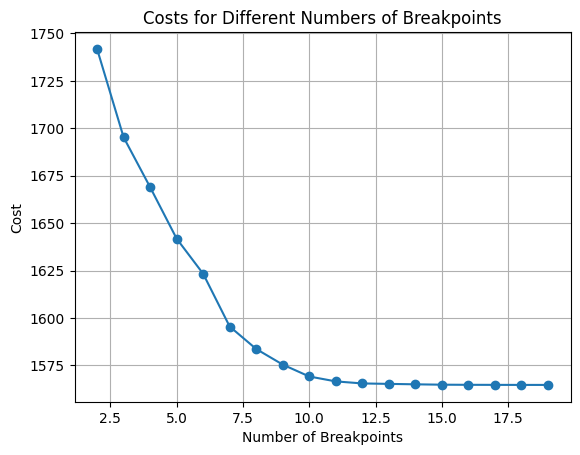

In [ ]:
import matplotlib.pyplot as plt
import ruptures as rpt

# Création d'une liste pour stocker les coûts pour différents nombres de breakpoints
costs = []

# Itération sur une plage de valeurs pour le nombre de breakpoints
for i, n_bkps in enumerate(range(2, 20)):
    # Initialisation de l'algorithme Dynp avec le modèle "l2" et une taille minimale de segment de 1
    algo = rpt.Dynp(model="l2", min_size=1)

    # Ajustement de l'algorithme aux données de la première série temporelle dans Y2
    algo.fit(Y2[0].values)

    # Prédiction des points de rupture pour le nombre de breakpoints spécifié
    result = algo.predict(n_bkps=n_bkps)

    # Initialisation de la fonction de coût L2 et ajustement aux données de la première série temporelle
    c = rpt.costs.CostL2().fit(Y2[0].values)

    # Calcul du coût total pour les points de rupture prédits
    cost = c.sum_of_costs(result)

    # Ajout du coût à la liste des coûts
    costs.append(cost)

# Création d'une grille de sous-tracés
fig, ax = plt.subplots()

# Tracé des coûts pour différents nombres de breakpoints
ax.plot(range(2, 20), costs, marker='o')
ax.set_title('Costs for Different Numbers of Breakpoints')
ax.set_xlabel('Number of Breakpoints')
ax.set_ylabel('Cost')

# Affichage de la grille
plt.grid(True)

# Affichage du tracé
plt.show()



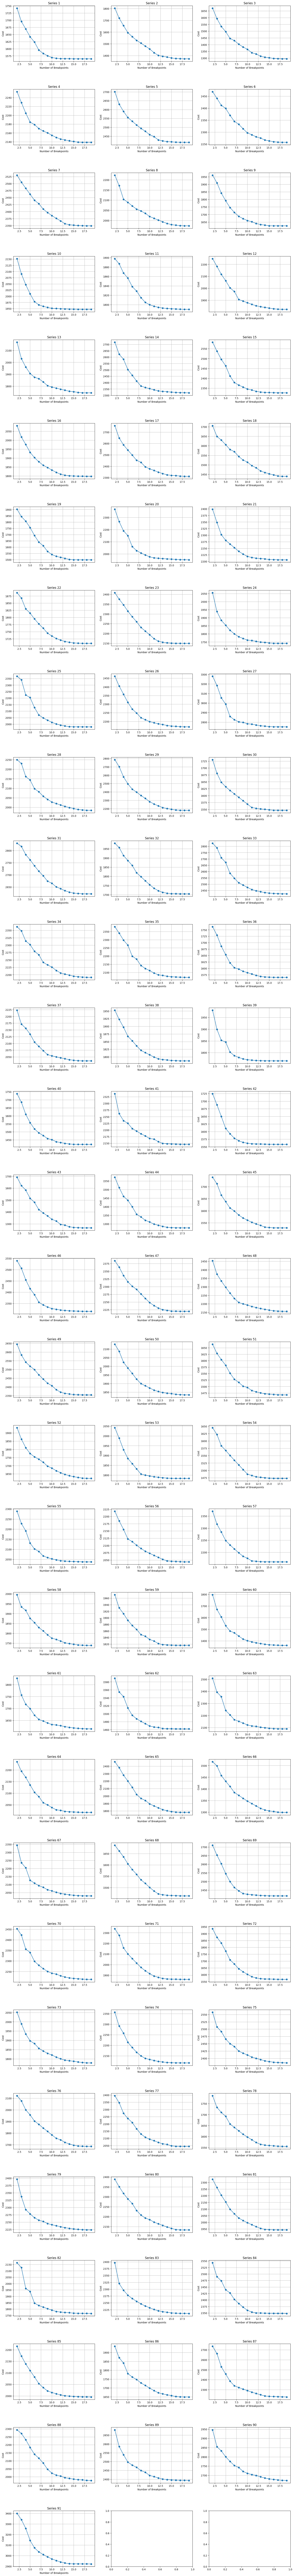

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt
import pandas as pd




# Définir le nombre de sous-tracés par ligne
subplots_per_row = 3

# Calculer le nombre total de lignes nécessaires
num_rows = int(np.ceil(91 / subplots_per_row))
# Créer la grille de sous-tracés
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(20, 6*num_rows))

# Ajuster l'espacement entre les sous-tracés
plt.subplots_adjust(hspace=0.5)

# Itération sur les séries temporelles dans Y2
for i, series in enumerate(Y2):
    series_values = Y2[i].values

    series_costs = []  # Initialisation d'une liste pour stocker les coûts pour chaque série temporelle

    # Boucle sur une plage de valeurs pour le nombre de breakpoints
    for n_bkps in range(2, 20):
        # Initialisation de l'algorithme Dynp avec le modèle "l2" et une taille minimale de segment de 1
        algo = rpt.Dynp(model="l2", min_size=1)

        # Ajustement de l'algorithme aux valeurs de la série temporelle actuelle
        algo.fit(series_values)

        # Prédiction des points de rupture pour le nombre de breakpoints spécifié
        result = algo.predict(n_bkps=n_bkps)

        # Initialisation de la fonction de coût L2 et ajustement aux valeurs de la série temporelle actuelle
        c = rpt.costs.CostL2().fit(series_values)

        # Calcul du coût total pour les points de rupture prédits
        cost = c.sum_of_costs(result)

        # Ajout du coût de cette série à la liste des coûts
        series_costs.append(cost)

    # Trouver les coordonnées du sous-tracé actuel dans la grille
    row = i // subplots_per_row
    col = i % subplots_per_row

    # Tracer sur le sous-tracé actuel
    axes[row, col].plot(range(2, 20), series_costs, marker='o')
    axes[row, col].set_title(f'Series {i+1}')
    axes[row, col].set_xlabel('Number of Breakpoints')
    axes[row, col].set_ylabel('Cost')
    axes[row, col].grid(True)

# Afficher les tracés
plt.show()



In [ ]:
# Nombre de séries
num_series = Y2.shape[0]
# le k optimal
k = 11
all_breakpoints = []

# Itérant sur toutes les séries
for series_index in range(num_series):
    series_data = Y2.iloc[series_index].values

    # Calculer les breakpoints pour la série actuelle avec bkps=12
    algo = rpt.Dynp(model="l2", min_size=1)
    algo.fit(series_data)
    result = algo.predict(n_bkps=k)

    breakpoints = result[:-1]
    all_breakpoints.append(breakpoints)

all_breakpoints = np.array(all_breakpoints)

# Afficher un tableau des breakpoints
print("Breakpoints for each series:")
print(all_breakpoints)


Breakpoints for each series:
[[ 5 20 25 ... 75 80 85]
 [15 25 30 ... 60 65 90]
 [10 20 30 ... 80 85 90]
 ...
 [ 5 10 20 ... 75 80 85]
 [ 5 10 25 ... 55 65 85]
 [ 5 20 25 ... 70 85 90]]


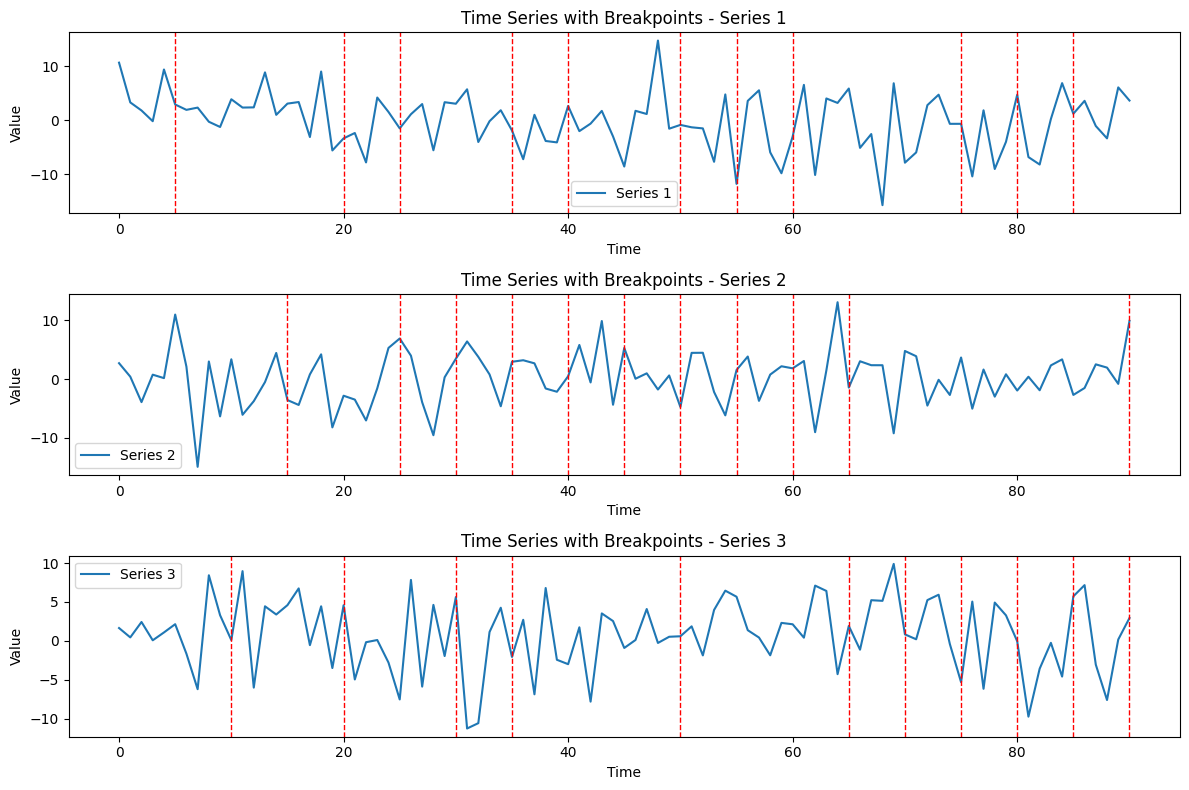

In [ ]:
num_series = 3  # Afficher les breakpoints pour les 3 premières series

fig, axes = plt.subplots(num_series, 1, figsize=(12, 8))

# Itérant sur les trois premières séries
for series_index in range(num_series):
    series_data = Y2.iloc[series_index].values

    # Calculer les breakpoints pour la série actuelle
    breakpoints = all_breakpoints[series_index]
    # Plotter les séries
    ax = axes[series_index]
    ax.plot(series_data, label=f'Series {series_index + 1}')

    for breakpoint in breakpoints:
        ax.axvline(breakpoint, color='red', linestyle='--', linewidth=1)

    ax.set_title(f'Time Series with Breakpoints - Series {series_index + 1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()
# Ajuster le layout
plt.tight_layout()
plt.show()

## SAX

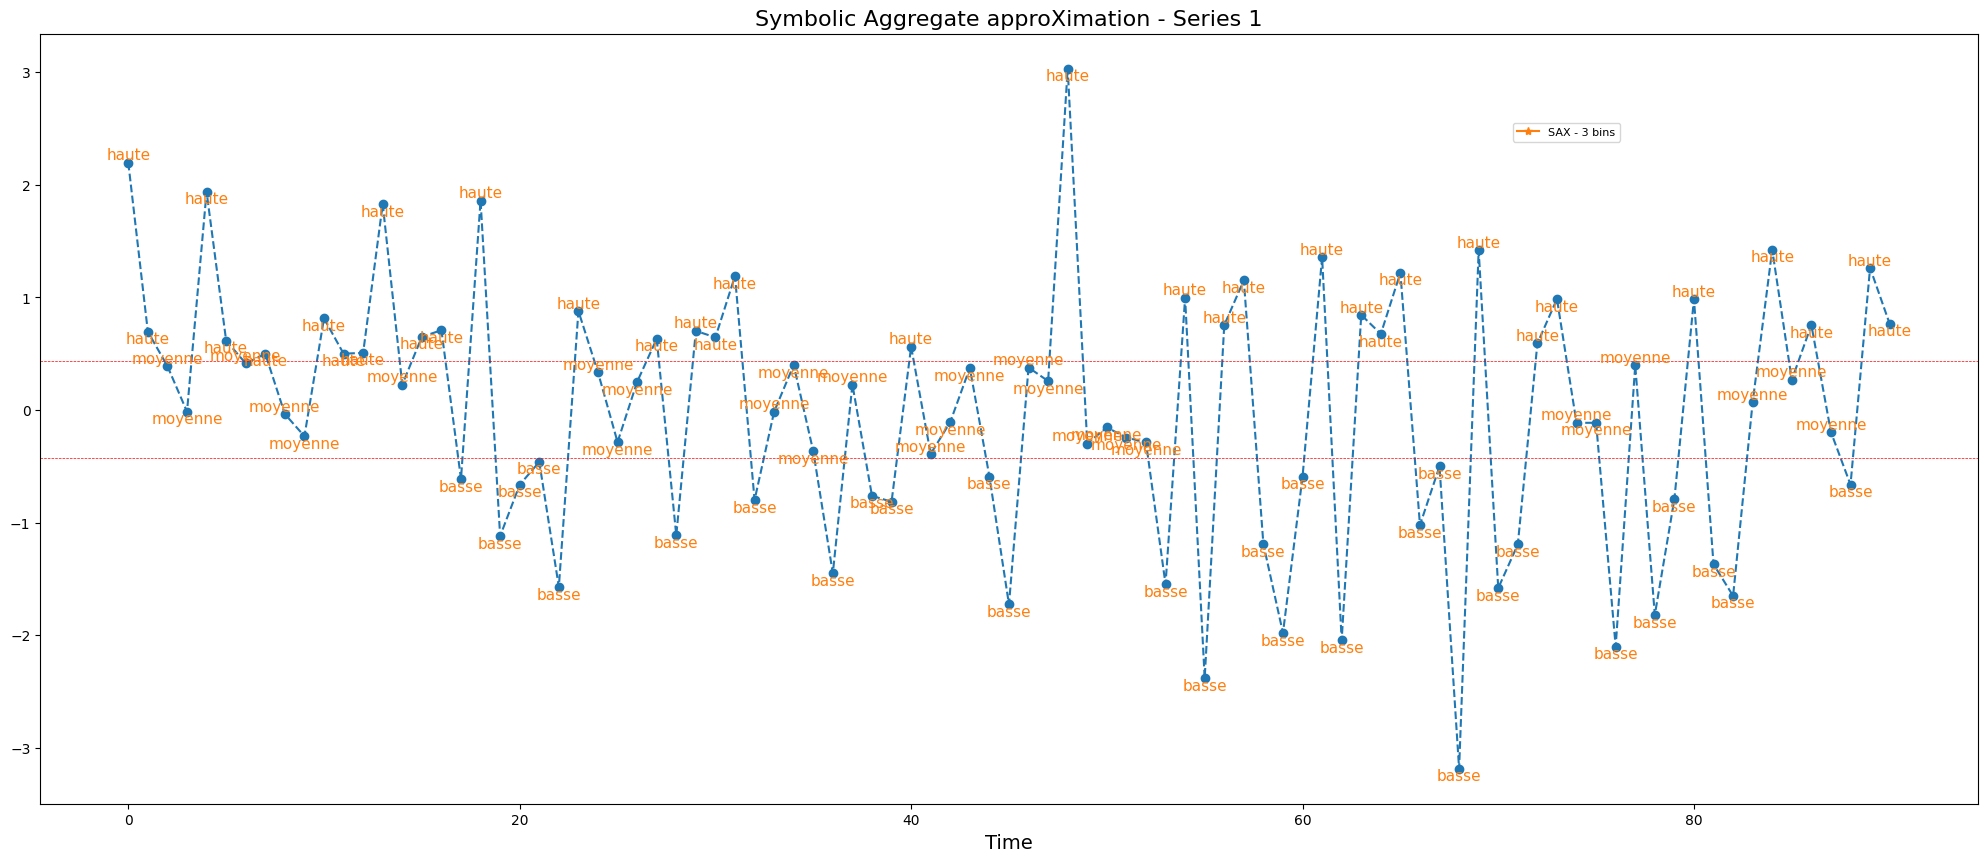

In [ ]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation

X = Y2.to_numpy()
X = X.T
X = (X - X.mean()) / X.std()  # Normalisation sur les colonnes
X = X.T

# Parameters
n_timestamps = 91

# SAX transformation
n_bins = 3
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal',alphabet=["basse","moyenne","haute"])
X_sax = sax.fit_transform(X)

# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1))

# Show the results for the first first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]
for i in range(1):
    plt.figure(figsize=(25, 10))
    plt.plot(X[i], 'o--', label='Original')
    for x, y, s, bottom in zip(range(n_timestamps), X[i], X_sax[i], bottom_bool):
        va = 'bottom' if bottom else 'top'
        plt.text(x, y, s, ha='center', va=va, fontsize=11, color='#ff7f0e')
    # Draw horizontal lines for bins
    for b in bins:
        plt.axhline(b, color='r', linestyle='--', linewidth=0.5)
    sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                               label='SAX - {0} bins'.format(n_bins))
    plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
    plt.xlabel('Time', fontsize=14)
    plt.title(f'Symbolic Aggregate approXimation - Series {i + 1}', fontsize=16)
    plt.show()


In [ ]:
Y_categoriel = pd.DataFrame(X_sax)
Y_categoriel

0        1        2        3        4        5        6        7   \
0     haute    haute  moyenne  moyenne    haute    haute  moyenne    haute   
1     haute  moyenne    basse  moyenne  moyenne    haute    haute    basse   
2   moyenne  moyenne    haute  moyenne  moyenne    haute  moyenne    basse   
3     basse    haute    basse  moyenne  moyenne  moyenne  moyenne    basse   
4     basse  moyenne    basse    haute  moyenne    basse    basse    basse   
..      ...      ...      ...      ...      ...      ...      ...      ...   
95    basse  moyenne    basse  moyenne    haute    basse  moyenne    basse   
96    basse    basse    basse    basse  moyenne  moyenne    basse  moyenne   
97    haute    haute  moyenne    haute    basse    haute  moyenne    haute   
98  moyenne  moyenne  moyenne  moyenne    haute    haute    basse  moyenne   
99  moyenne  moyenne    basse    haute    haute  moyenne  moyenne    basse   

         8        9   ...       81       82       83       84       85  \
0   moyenne  moyenne  ...    basse    basse  moyenne    haute  moyenne   
1     haute    basse  ...  moyenne  moyenne    haute    haute    basse   
2     haute    haute  ...    basse    basse  moyenne    basse    haute   
3   moyenne    haute  ...    haute  moyenne    haute  moyenne    haute   
4     haute    basse  ...    basse    haute    basse    haute    basse   
..      ...      ...  ...      ...      ...      ...      ...      ...   
95  moyenne  moyenne  ...    haute  moyenne  moyenne    haute  moyenne   
96    haute  moyenne  ...  moyenne    basse    basse    haute    haute   
97    basse    haute  ...    basse    basse    basse    basse    basse   
98  moyenne    haute  ...    basse    haute    basse  moyenne    haute   
99  moyenne  moyenne  ...  moyenne    haute  moyenne    haute  moyenne   

         86       87       88       89       90  
0     haute  moyenne    basse    haute    haute  
1   moyenne    haute  moyenne  moyenne    haute  
2     haute    basse    basse  moyenne    haute  
3     haute  moyenne    haute  moyenne  moyenne  
4     haute    haute    basse  moyenne    basse  
..      ...      ...      ...      ...      ...  
95    haute    haute  moyenne  moyenne  moyenne  
96  moyenne    haute    haute    haute    haute  
97    basse    basse    basse    basse  moyenne  
98    basse  moyenne    haute    haute    haute  
99    basse    basse  moyenne    basse  moyenne  

[100 rows x 91 columns]

# K-Means Classification

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mettre les jours en lignes
Y_categoriel_transposee = Y_categoriel.T
Y_categoriel_transposee

0        1        2        3        4        5        6        7   \
0     haute    haute  moyenne    basse    basse  moyenne  moyenne    basse   
1     haute  moyenne  moyenne    haute  moyenne  moyenne  moyenne  moyenne   
2   moyenne    basse    haute    basse    basse    haute  moyenne  moyenne   
3   moyenne  moyenne  moyenne  moyenne    haute    haute    basse    haute   
4     haute  moyenne  moyenne  moyenne  moyenne    basse    haute  moyenne   
..      ...      ...      ...      ...      ...      ...      ...      ...   
86    haute  moyenne    haute    haute    haute    basse    basse  moyenne   
87  moyenne    haute    basse  moyenne    haute  moyenne    basse    basse   
88    basse  moyenne    basse    haute    basse  moyenne    basse    basse   
89    haute  moyenne  moyenne  moyenne  moyenne  moyenne    haute  moyenne   
90    haute    haute    haute  moyenne    basse    basse    haute    haute   

         8        9   ...       90       91       92       93       94  \
0     haute    haute  ...    basse  moyenne  moyenne    basse  moyenne   
1     haute    basse  ...    haute  moyenne  moyenne  moyenne    basse   
2   moyenne    basse  ...    basse    basse    haute    basse  moyenne   
3     haute  moyenne  ...  moyenne    haute  moyenne    haute    basse   
4     basse  moyenne  ...    basse  moyenne    haute    haute    haute   
..      ...      ...  ...      ...      ...      ...      ...      ...   
86    haute    basse  ...    basse    haute    basse    basse  moyenne   
87  moyenne  moyenne  ...    basse  moyenne  moyenne    basse    basse   
88    basse    basse  ...    basse    basse    haute  moyenne    basse   
89    basse  moyenne  ...    haute    haute  moyenne    haute  moyenne   
90    basse    haute  ...    basse  moyenne    basse    haute    haute   

         95       96       97       98       99  
0     basse    basse    haute  moyenne  moyenne  
1   moyenne    basse    haute  moyenne  moyenne  
2     basse    basse  moyenne  moyenne    basse  
3   moyenne    basse    haute  moyenne    haute  
4     haute  moyenne    basse    haute    haute  
..      ...      ...      ...      ...      ...  
86    haute  moyenne    basse    basse    basse  
87    haute    haute    basse  moyenne    basse  
88  moyenne    haute    basse    haute  moyenne  
89  moyenne    haute    basse    haute    basse  
90  moyenne    haute  moyenne    haute  moyenne  

[91 rows x 100 columns]

In [ ]:
# Convertir les catégories en valeurs numériques
label_encoder = LabelEncoder()

for column in Y_categoriel_transposee.columns:
    Y_categoriel_transposee[column] = label_encoder.fit_transform(Y_categoriel_transposee[column])
Y_categoriel_transposee

# haute : 1 , moyenne : 2 , basse : 0

0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0    1   1   2   0   0   2   2   0   1   1  ...   0   2   2   0   2   0   0   
1    1   2   2   1   2   2   2   2   1   0  ...   1   2   2   2   0   2   0   
2    2   0   1   0   0   1   2   2   2   0  ...   0   0   1   0   2   0   0   
3    2   2   2   2   1   1   0   1   1   2  ...   2   1   2   1   0   2   0   
4    1   2   2   2   2   0   1   2   0   2  ...   0   2   1   1   1   1   2   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
86   1   2   1   1   1   0   0   2   1   0  ...   0   1   0   0   2   1   2   
87   2   1   0   2   1   2   0   0   2   2  ...   0   2   2   0   0   1   1   
88   0   2   0   1   0   2   0   0   0   0  ...   0   0   1   2   0   2   1   
89   1   2   2   2   2   2   1   2   0   2  ...   1   1   2   1   2   2   1   
90   1   1   1   2   0   0   1   1   0   1  ...   0   2   0   1   1   2   1   

    97  98  99  
0    1   2   2  
1    1   2   2  
2    2   2   0  
3    1   2   1  
4    0   1   1  
..  ..  ..  ..  
86   0   0   0  
87   0   2   0  
88   0   1   2  
89   0   1   0  
90   2   1   2  

[91 rows x 100 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

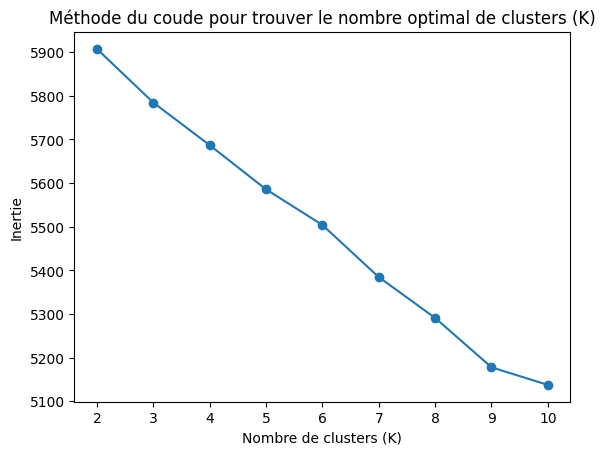

In [ ]:
# Liste pour stocker les valeurs de l'inertie
inertia_values = []
nombre_essais_k = 11

# Tester différentes valeurs de K (nombre de clusters)
for k in range(2, nombre_essais_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y_categoriel_transposee)
    inertia_values.append(kmeans.inertia_)

# Tracez la courbe de l'inertie en fonction de K
plt.plot(range(2, nombre_essais_k), inertia_values, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters (K)')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.show()

Après avoir tracé notre courbe de coude, nous prenons k=7

In [ ]:
# Appliquer KMeans avec le nombre de clusters souhaité (n_clusters)
nombre_clusters = 7
kmeans = KMeans(n_clusters=nombre_clusters, random_state=42)
kmeans.fit(Y_categoriel_transposee)
pred_labels = kmeans.labels_
print(pred_labels)

[2 1 2 1 0 6 1 1 0 3 0 5 4 0 0 0 4 1 1 5 3 0 0 3 5 0 0 4 4 2 0 0 5 1 4 6 6
 0 3 0 0 2 3 0 2 0 4 3 3 1 1 3 0 0 4 0 3 4 3 2 6 6 6 2 0 0 0 0 2 4 1 6 5 3
 4 0 1 4 2 0 3 2 1 4 0 1 6 5 3 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
Y_df = pd.DataFrame(Y_categoriel_transposee).copy()
Y_df['label'] = pred_labels
Y_df

0  1  2  3  4  5  6  7  8  9  ...  91  92  93  94  95  96  97  98  99  \
0   1  1  2  0  0  2  2  0  1  1  ...   2   2   0   2   0   0   1   2   2   
1   1  2  2  1  2  2  2  2  1  0  ...   2   2   2   0   2   0   1   2   2   
2   2  0  1  0  0  1  2  2  2  0  ...   0   1   0   2   0   0   2   2   0   
3   2  2  2  2  1  1  0  1  1  2  ...   1   2   1   0   2   0   1   2   1   
4   1  2  2  2  2  0  1  2  0  2  ...   2   1   1   1   1   2   0   1   1   
.. .. .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
86  1  2  1  1  1  0  0  2  1  0  ...   1   0   0   2   1   2   0   0   0   
87  2  1  0  2  1  2  0  0  2  2  ...   2   2   0   0   1   1   0   2   0   
88  0  2  0  1  0  2  0  0  0  0  ...   0   1   2   0   2   1   0   1   2   
89  1  2  2  2  2  2  1  2  0  2  ...   1   2   1   2   2   1   0   1   0   
90  1  1  1  2  0  0  1  1  0  1  ...   2   0   1   1   2   1   2   1   2   

    label  
0       2  
1       1  
2       2  
3       1  
4       0  
..    ...  
86      6  
87      5  
88      3  
89      0  
90      3  

[91 rows x 101 columns]

In [ ]:
# Voir les jours avec label=0
Y_df_0 = Y_df[(Y_df['label'] == 0)].copy()
for i in range(len(Y_df_0)):
  x0 = Y_df_0.iloc[i].value_counts()[0]
  x1 = Y_df_0.iloc[i].value_counts()[1]
  x2 = Y_df_0.iloc[i].value_counts()[2]
  print("jour : ", i+1 ," | consommation haute(1) : ", x1 ," | consommation moyenne(2) : ", x2, " | consommation basse(0) : ", x0)

jour :  1  | consommation haute(1) :  36  | consommation moyenne(2) :  36  | consommation basse(0) :  29
jour :  2  | consommation haute(1) :  32  | consommation moyenne(2) :  38  | consommation basse(0) :  31
jour :  3  | consommation haute(1) :  29  | consommation moyenne(2) :  35  | consommation basse(0) :  37
jour :  4  | consommation haute(1) :  27  | consommation moyenne(2) :  38  | consommation basse(0) :  36
jour :  5  | consommation haute(1) :  31  | consommation moyenne(2) :  42  | consommation basse(0) :  28
jour :  6  | consommation haute(1) :  27  | consommation moyenne(2) :  36  | consommation basse(0) :  38
jour :  7  | consommation haute(1) :  31  | consommation moyenne(2) :  39  | consommation basse(0) :  31
jour :  8  | consommation haute(1) :  41  | consommation moyenne(2) :  29  | consommation basse(0) :  31
jour :  9  | consommation haute(1) :  30  | consommation moyenne(2) :  38  | consommation basse(0) :  33
jour :  10  | consommation haute(1) :  36  | consommati

In [ ]:
# Voir les jours avec label=3
Y_df_3 = Y_df[(Y_df['label'] == 3)].copy()
for i in range(len(Y_df_3)):
  x0 = Y_df_3.iloc[i].value_counts()[0]
  x1 = Y_df_3.iloc[i].value_counts()[1]
  x2 = Y_df_3.iloc[i].value_counts()[2]
  print("jour : ", i+1 ," | consommation haute(1) : ", x1 ," | consommation moyenne(2) : ", x2, " | consommation basse(0) : ", x0)

jour :  1  | consommation haute(1) :  40  | consommation moyenne(2) :  28  | consommation basse(0) :  32
jour :  2  | consommation haute(1) :  30  | consommation moyenne(2) :  33  | consommation basse(0) :  37
jour :  3  | consommation haute(1) :  32  | consommation moyenne(2) :  39  | consommation basse(0) :  29
jour :  4  | consommation haute(1) :  23  | consommation moyenne(2) :  38  | consommation basse(0) :  39
jour :  5  | consommation haute(1) :  36  | consommation moyenne(2) :  37  | consommation basse(0) :  27
jour :  6  | consommation haute(1) :  25  | consommation moyenne(2) :  33  | consommation basse(0) :  42
jour :  7  | consommation haute(1) :  31  | consommation moyenne(2) :  26  | consommation basse(0) :  43
jour :  8  | consommation haute(1) :  28  | consommation moyenne(2) :  40  | consommation basse(0) :  32
jour :  9  | consommation haute(1) :  27  | consommation moyenne(2) :  43  | consommation basse(0) :  30
jour :  10  | consommation haute(1) :  31  | consommati

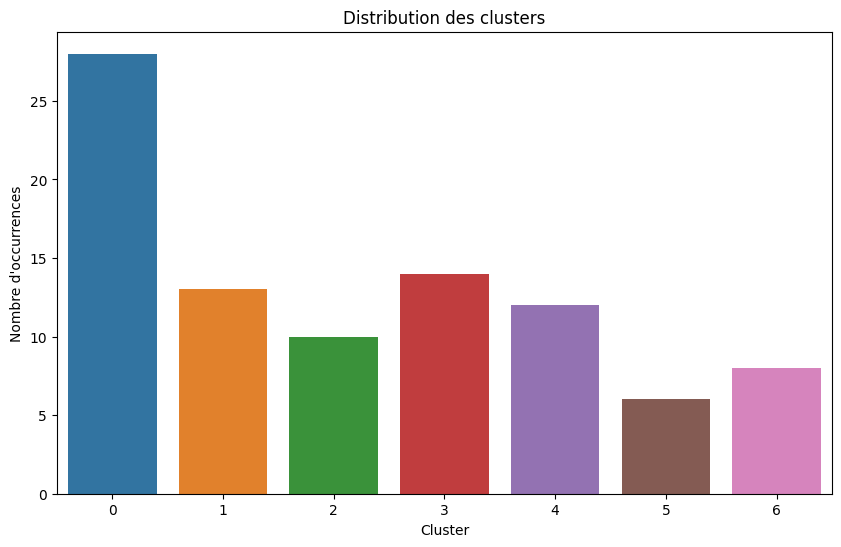

In [ ]:
# Créer un graphique en barres pour visualiser nos clusters

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=Y_df)
plt.title('Distribution des clusters')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'occurrences')
plt.show()